Enter day: 1
Enter month: 4
Enter location: marina bay

Do you mean?
1. Marina Bay, Bayfront Avenue, Downtown Central, Downtown Core, Singapore, Central, 18990, Singapore
2. Marina Bay, Downtown Core, Singapore, Central, 018935, Singapore
3. Marina Bay, Miri, Sarawak, Malaysia
4. Marina Bay, Richmond, Contra Costa County, California, 94804, United States
5. Marina Bay, Arborwood, Fort Myers, Lee County, Florida, 33966-6536, United States
6. Marina Bay, Varyl Begg Estate, Gibraltar, GX111AA, Gibraltar
7. Marina Bay, L'Orillois, Dinard, Saint-Malo, Ille-et-Vilaine, Bretagne, France métropolitaine, 35800, France
8. Marina Bay, Discovery Bay, Contra Costa County, California, 94505, United States
9. Marina Bay, South Dundas, Stormont, Dundas and Glengarry Counties, Eastern Ontario, Ontario, Canada
10. Marina Bay, Westmere, Chestermere, Alberta, T1X 0S1, Canada
11. Try again
Your choice: 1

Enter search radius in km: 1

Time Series:


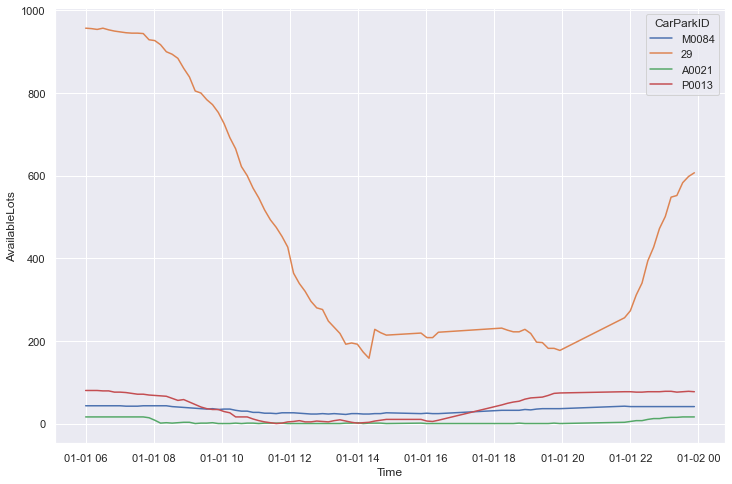

In [25]:
import pandas as pd
import os
from ipynb.fs.defs.Map import get_search_location, get_user_location, carparks_nearby
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

day = input("Enter day: ")
month = input("Enter month: ")
filename = "{}_{}_2021_carpark_availability.csv".format(day, month)

if filename not in os.listdir("./Data/"):
    print("Data not found.")
else:
    path = os.path.join("./Data/", filename)
    df = pd.read_csv(path)
    
    while True:
        location = input("Enter location: ")
        search_result = get_search_location(location)
        print()
        print("Do you mean?")
        for i in range(len(search_result["address"])):
            print(str(i+1) + ". " + search_result["address"][i])
        print(str(len(search_result["address"])+1) + ". Try again")
        
        while True:
            try:
                search_choice = int(input("Your choice: "))
                if search_choice < 1 or search_choice > len(search_result["address"]) + 1:
                    print("Invalid choice!")
                else:
                    break
            except:
                print("Invalid choice!")
                
        if search_choice < len(search_result["address"]): 
            print()
            break
    
    radius = float(input("Enter search radius in km: "))
    nearby_ID_list = carparks_nearby(df, search_result["coordinates"][search_choice-1], radius)
    
    df_near = pd.DataFrame()
    for i in nearby_ID_list:
        df_near = df_near.append(df[df["CarParkID"] == i])
    
    df_near['Time'] = pd.to_datetime(df['Time'], format="%H:%M:%S")
    
    print("\nTime Series:")
    f = plt.figure(figsize=(12, 8))
    sb.lineplot(x="Time", y="AvailableLots", hue="CarParkID", data=df_near)